# Data Exploration

In this notebook we import Bitcoin (BTC) and Ethereum (ETH) daily data (OHLC prices, volumes, exchange inflows, exchange outflows and echange supply) and hourly prices from June 2016 to July 2021 and execute some data exploration and feature engineering.

In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
#!pip install cryptocompare
import cryptocompare
cryptocompare.cryptocompare._set_api_key_parameter('b7630a944ebbfc1d880c1abc17ecd2ec74e06c27bda3c9921967b02e883f49bc')

'&api_key=b7630a944ebbfc1d880c1abc17ecd2ec74e06c27bda3c9921967b02e883f49bc'

In [2]:
#import daily data for exchange flows
btc_flows = pd.read_csv('data\BTC_flow-in_flow-out_supply_cex.csv')
eth_flows = pd.read_csv('data\ETH_flow-in_flow-out_supply_cex.csv')
btc_flows['date'] = pd.to_datetime(btc_flows['date'].values)
eth_flows['date'] = pd.to_datetime(eth_flows['date'].values)

In [3]:
btc_flows

,date,exch.binance.flow.in.ntv,exch.binance.flow.out.ntv,exch.sply.binance.ntv,exch.bitfinex.flow.in.ntv,exch.bitfinex.flow.out.ntv,exch.sply.bitfinex.ntv,exch.bitmex.flow.in.ntv,exch.bitmex.flow.out.ntv,exch.sply.bitmex.ntv,...,exch.sply.gemini.ntv,exch.huobi.flow.in.ntv,exch.huobi.flow.out.ntv,exch.sply.huobi.ntv,exch.kraken.flow.in.ntv,exch.kraken.flow.out.ntv,exch.sply.kraken.ntv,exch.poloniex.flow.in.ntv,exch.poloniex.flow.out.ntv,exch.sply.poloniex.ntv
0,2016-06-30 00:00:00+00:00,0.000000,0.000000,0.000000,9419.647545,11479.620611,167890.725094,174.761639,75.429668,5705.742053,...,35271.024779,12971.522570,15346.556200,155104.499984,8406.251125,6382.225557,136287.049780,3339.127876,6117.253859,91228.139344
1,2016-07-01 00:00:00+00:00,0.000000,0.000000,0.000000,8738.295316,4498.290320,172130.730090,123.704818,31.153820,5798.293052,...,35165.099632,12039.740758,14307.837400,152836.403342,8871.149823,9800.028022,135358.171581,4521.577464,3908.410875,91841.305934
2,2016-07-02 00:00:00+00:00,0.000000,0.000000,0.000000,1952.210317,5764.101718,168318.838689,49.918362,75.294382,5772.917032,...,35120.704915,9297.210590,18456.844700,143676.769232,6622.037333,5949.571922,136030.636992,1967.826135,3043.257428,90765.874641
3,2016-07-03 00:00:00+00:00,0.000000,0.000000,0.000000,7972.210093,2734.607260,173556.441522,78.658338,81.223512,5770.351858,...,35523.072313,11517.140165,21047.291600,134146.617797,4468.864680,4885.568721,135613.932951,2885.741746,2861.865038,90789.751350
4,2016-07-04 00:00:00+00:00,0.000000,0.000000,0.000000,4649.397890,4360.802519,173845.036893,40.089256,63.012428,5747.428687,...,35708.691777,13214.041096,9823.914900,137536.743993,6464.045017,3302.568090,138775.409878,8081.998348,7402.247393,91469.502304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,2021-07-24 00:00:00+00:00,7484.624124,7767.428140,561330.618537,163.782786,481.033719,202426.072614,215.769574,328.007630,110146.095655,...,265615.429072,1905.295583,2028.122866,127418.603961,2531.235795,3191.096732,160626.170019,86.562362,20.738296,28279.456375
1851,2021-07-25 00:00:00+00:00,8945.598201,13479.656748,556839.241845,223.641169,400.043192,202249.700575,30.034319,456.512898,109719.617076,...,266012.024232,1668.081124,3105.582231,125982.395409,2594.017629,3419.990522,160082.008894,173.848648,94.055124,28359.257117
1852,2021-07-26 00:00:00+00:00,25600.767649,27183.122003,555330.723859,1347.931865,3006.888855,200590.743585,927.920557,509.945875,110137.591757,...,268145.411838,6716.648446,5544.852773,127154.792672,5246.785635,5573.906869,159959.742814,156.418256,329.548424,28186.128717
1853,2021-07-27 00:00:00+00:00,21846.736384,15543.689283,561739.591908,517.217500,4725.077305,196382.883779,379.313667,504.228227,110012.677197,...,268349.409074,3558.748193,5954.989561,124759.826071,4056.570311,5050.945812,159376.896249,103.151444,103.280307,28186.084750


In [8]:
#import hourly data for btc prices
first_date = pd.to_datetime(btc_flows['date'].values[0])
last_date = datetime.datetime(2021,7,30)
d = last_date
historical_prices = []
while d > first_date:
    prices = cryptocompare.get_historical_price_hour('BTC', 'USD', limit=2000, exchange='CCCAGG', toTs=d)
    historical_prices = prices + historical_prices
    d = datetime.datetime.fromtimestamp(prices[0]['time'])
btc_prices = pd.DataFrame(data=historical_prices)
btc_prices['time'] = pd.to_datetime(btc_prices['time'], unit='s')
btc_prices = btc_prices[btc_prices['time'] >= datetime.datetime(2016,7,1)]
btc_prices['date'] = [pd.to_datetime(t).date() for t in btc_prices['time'].values]

#import hourly data for eth prices
d = last_date
historical_prices = []
while d > first_date:
    prices = cryptocompare.get_historical_price_hour('ETH', 'USD', limit=2000, exchange='CCCAGG', toTs=d)
    historical_prices = prices + historical_prices
    d = datetime.datetime.fromtimestamp(prices[0]['time'])
eth_prices = pd.DataFrame(data=historical_prices)
eth_prices['time'] = pd.to_datetime(eth_prices['time'], unit='s')
eth_prices = eth_prices[eth_prices['time'] >= datetime.datetime(2016,7,1)]
eth_prices['date'] = [pd.to_datetime(t).date() for t in eth_prices['time'].values]

In [9]:
btc_prices

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,date
1482,2016-07-01 00:00:00,670.49,663.55,669.78,1791.00,1197436.22,666.96,direct,,2016-07-01
1483,2016-07-01 01:00:00,672.82,666.23,666.96,2755.94,1853124.98,672.05,direct,,2016-07-01
1484,2016-07-01 02:00:00,677.70,669.34,672.05,5982.76,4061115.03,676.44,direct,,2016-07-01
1485,2016-07-01 03:00:00,679.69,672.17,676.44,3363.81,2284767.85,676.24,direct,,2016-07-01
1486,2016-07-01 04:00:00,684.68,674.77,676.24,6694.84,4591180.05,681.17,direct,,2016-07-01
...,...,...,...,...,...,...,...,...,...,...
46018,2021-07-29 18:00:00,39684.38,39411.87,39618.65,1522.31,60192666.11,39542.07,direct,,2021-07-29
46019,2021-07-29 19:00:00,39742.43,39480.04,39542.07,1104.82,43746589.83,39689.78,direct,,2021-07-29
46020,2021-07-29 20:00:00,39830.20,39633.40,39689.78,657.39,26117626.58,39719.05,direct,,2021-07-29
46021,2021-07-29 21:00:00,39765.45,39522.47,39719.05,852.32,33782716.22,39564.38,direct,,2021-07-29


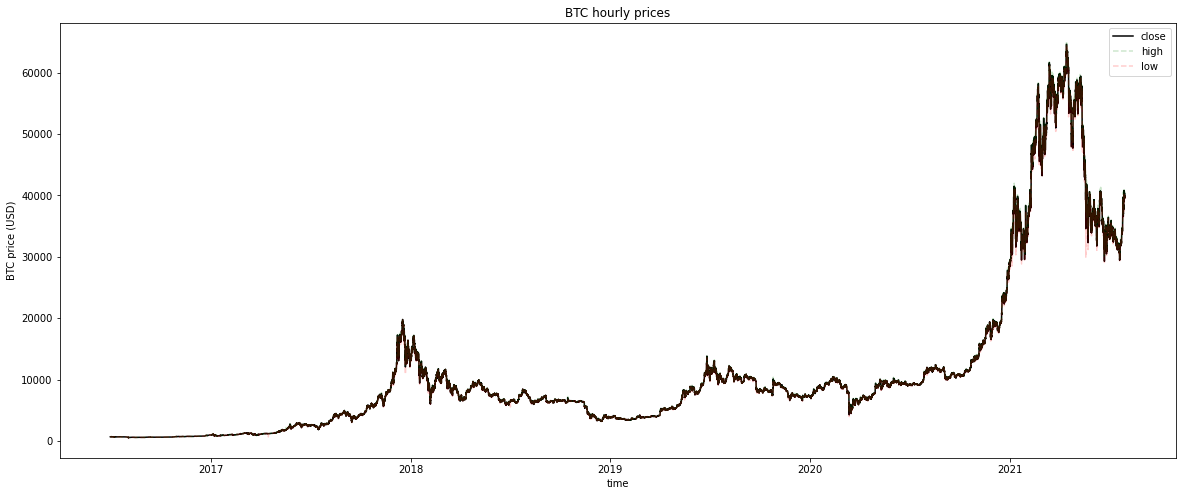

In [31]:
plt.figure(figsize=(20,8))
plt.plot(btc_prices['time'], btc_prices['close'], label='close', color='black')
plt.plot(btc_prices['time'],btc_prices['high'], '--', label='high', color='green', alpha=0.2)
plt.plot(btc_prices['time'],btc_prices['low'], '--', label='low', color='red', alpha=0.2)
plt.legend()
plt.xlabel('time')
plt.ylabel('BTC price (USD)')
plt.title('BTC hourly prices')
plt.show()

In [13]:
#import daily data for btc prices
first_date = pd.to_datetime(btc_flows['date'].values[0])
last_date = datetime.datetime(2021,7,29)
d = last_date
historical_prices = []
while d > first_date:
    prices = cryptocompare.get_historical_price_day('BTC', 'USD', limit=2000, exchange='CCCAGG', toTs=d)
    historical_prices = prices + historical_prices
    d = datetime.datetime.fromtimestamp(prices[0]['time'])
btc_daily_prices = pd.DataFrame(data=historical_prices)
btc_daily_prices['time'] = pd.to_datetime(btc_daily_prices['time'], unit='s')
btc_daily_prices = btc_daily_prices[btc_daily_prices['time'] >= datetime.datetime(2016,6,30)]

#import daily data for eth prices
d = last_date
historical_prices = []
while d > first_date:
    prices = cryptocompare.get_historical_price_day('ETH', 'USD', limit=2000, exchange='CCCAGG', toTs=d)
    historical_prices = prices + historical_prices
    d = datetime.datetime.fromtimestamp(prices[0]['time'])
eth_daily_prices = pd.DataFrame(data=historical_prices)
eth_daily_prices['time'] = pd.to_datetime(eth_daily_prices['time'], unit='s')
eth_daily_prices = eth_daily_prices[eth_daily_prices['time'] >= datetime.datetime(2016,6,30)]

In [14]:
btc_daily_prices

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
146,2016-06-30,673.04,631.24,636.54,88203.81,5.821506e+07,670.02,direct,
147,2016-07-01,685.11,661.09,670.02,92227.36,6.239448e+07,674.57,direct,
148,2016-07-02,700.46,671.46,674.57,67380.47,4.655580e+07,698.06,direct,
149,2016-07-03,701.49,644.61,698.06,99268.29,6.659146e+07,661.64,direct,
150,2016-07-04,679.03,644.04,661.64,63905.01,4.275694e+07,675.16,direct,
...,...,...,...,...,...,...,...,...,...
1996,2021-07-24,34519.75,33429.09,33637.92,20217.05,6.860172e+08,34282.56,direct,
1997,2021-07-25,35382.63,33892.36,34282.56,22685.72,7.819298e+08,35369.93,direct,
1998,2021-07-26,40553.85,35270.24,35369.93,100269.43,3.840983e+09,37269.52,direct,
1999,2021-07-27,39535.50,36422.45,37269.52,58179.65,2.197490e+09,39496.69,direct,


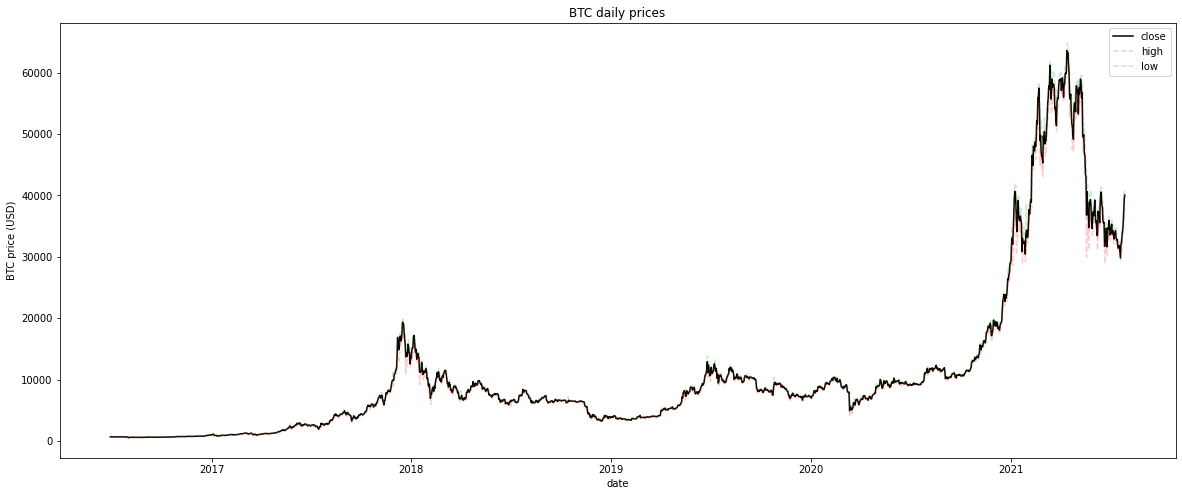

In [32]:
plt.figure(figsize=(20,8))
plt.plot(btc_daily_prices['time'],btc_daily_prices['close'], label='close', color='black')
plt.plot(btc_daily_prices['time'],btc_daily_prices['high'], '--', label='high', color='green', alpha=0.2)
plt.plot(btc_daily_prices['time'],btc_daily_prices['low'], '--', label='low', color='red', alpha=0.2)
plt.legend()
plt.xlabel('date')
plt.ylabel('BTC price (USD)')
plt.title('BTC daily prices')
plt.show()

In [22]:
#import and clean daily volume data
btc_volume_data = pd.read_csv(r'data\btc_volume_data.csv')
eth_volume_data = pd.read_csv(r'data\eth_volume_data.csv')
btc_volume_data['Vol.'] = (btc_volume_data['Vol.'].replace(r'[KM]+$', '', regex=True).astype(float) * \
                           btc_volume_data['Vol.'] .str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
eth_volume_data['Vol.'] = eth_volume_data['Vol.'].replace('-', '0')
eth_volume_data['Vol.'] = (eth_volume_data['Vol.'].replace(r'[KM]+$', '', regex=True).astype(float) * \
                           eth_volume_data['Vol.'] .str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
btc_volume = btc_volume_data['Vol.'].values
eth_volume = eth_volume_data['Vol.'].values

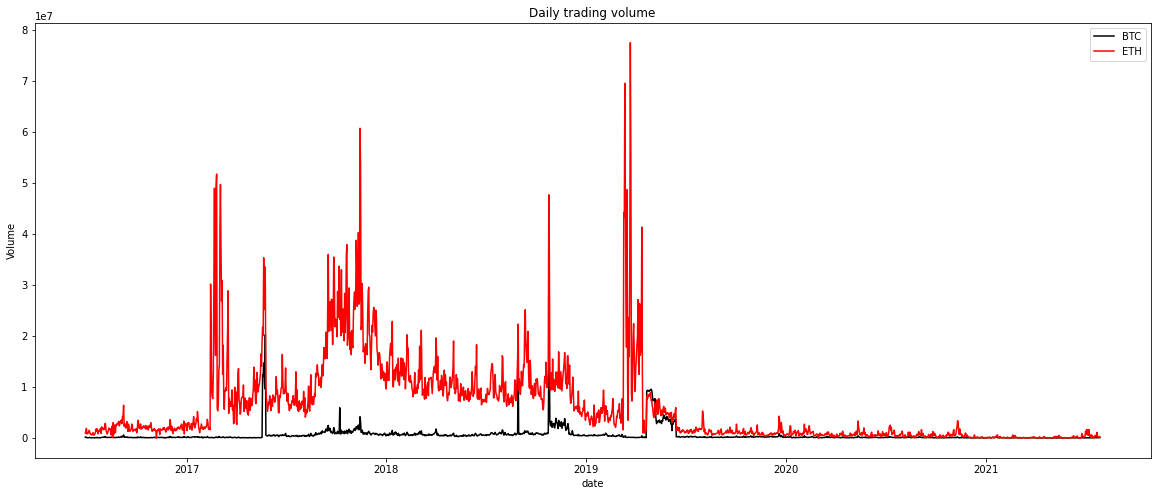

In [26]:
plt.figure(figsize=(20,8))
plt.plot(btc_daily_prices['time'], btc_volume, color='black', label='BTC')
plt.plot(btc_daily_prices['time'], eth_volume, color='red', label='ETH')
plt.legend()
plt.xlabel('date')
plt.ylabel('Volume')
plt.title('Daily trading volume')
plt.show()

In [25]:
#create rolling 5-day average volatility from hourly data
grouped_std_btc = btc_prices.groupby([btc_prices.time.dt.date]).std()
weekly_vol_btc = grouped_std_btc['close'].rolling(5).mean().dropna()

grouped_std_eth = eth_prices.groupby([eth_prices.time.dt.date]).std()
weekly_vol_eth = grouped_std_eth['close'].rolling(5).mean().dropna()

grouped_std_btc

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2016-07-01,4.193951,4.197028,3.945586,2233.602995,1.510411e+06,3.894469
2016-07-02,8.473913,7.649210,8.087889,2494.273195,1.731389e+06,8.094704
2016-07-03,15.686254,17.211058,16.774750,3707.115044,2.455303e+06,16.291608
2016-07-04,4.961779,6.981684,5.666947,1251.085781,8.309247e+05,5.894373
2016-07-05,4.485935,5.462520,4.766658,1231.667769,8.192871e+05,4.692973
...,...,...,...,...,...,...
2021-07-25,252.431469,205.429104,194.277219,638.548286,2.239663e+07,281.067165
2021-07-26,791.041980,873.589337,895.512988,3027.079562,1.158722e+08,690.447017
2021-07-27,709.687638,588.893252,640.557558,801.013566,3.087463e+07,735.588404


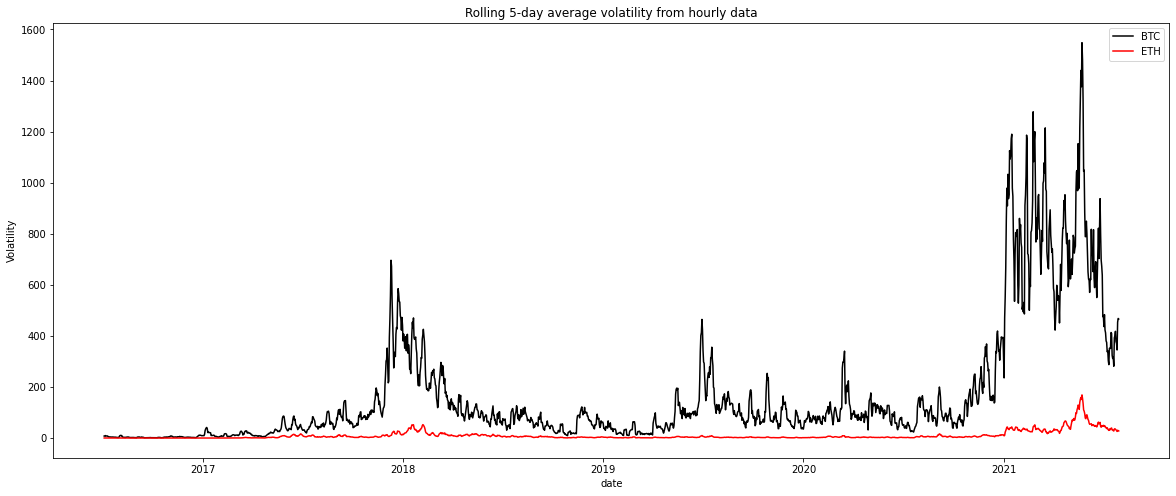

In [29]:
plt.figure(figsize=(20,8))
plt.plot(weekly_vol_btc.index, weekly_vol_btc, color='black', label='BTC')
plt.plot(weekly_vol_eth.index, weekly_vol_eth, color='red', label='ETH')
plt.legend()
plt.xlabel('date')
plt.ylabel('Volatility')
plt.title('Rolling 5-day average volatility from hourly data')
plt.show()

In [30]:
#normalize inflows and outflows for each exchange dividing by the exchange supply (and cancel the supply column)
for i in range(9):
    ix = 1 + 3*i
    inflow = btc_flows[btc_flows.columns[ix]]
    outflow = btc_flows[btc_flows.columns[ix+1]]
    supply = btc_flows[btc_flows.columns[ix+2]]
    btc_flows[btc_flows.columns[ix]] = np.divide(inflow, supply, out=np.zeros_like(inflow), where= supply!=0)
    btc_flows[btc_flows.columns[ix+1]] = np.divide(outflow, supply, out=np.zeros_like(outflow), where= supply!=0)


btc_flows.drop(['exch.sply.binance.ntv', 'exch.sply.bitfinex.ntv', 'exch.sply.bitmex.ntv', 'exch.sply.bitstamp.ntv', 'exch.sply.bittrex.ntv', 'exch.sply.gemini.ntv', 'exch.sply.huobi.ntv', 
                'exch.sply.kraken.ntv', 'exch.sply.poloniex.ntv'], 1, inplace=True)

#compute NET flows (and cancel in and out flows)
btc_flows['binance.NET'] = btc_flows['exch.binance.flow.in.ntv'] - btc_flows['exch.binance.flow.out.ntv']
btc_flows['bitfinex.NET'] = btc_flows['exch.bitfinex.flow.in.ntv'] - btc_flows['exch.bitfinex.flow.out.ntv']
btc_flows['bitmex.NET'] = btc_flows['exch.bitmex.flow.in.ntv'] - btc_flows['exch.bitmex.flow.out.ntv']
btc_flows['bitstamp.NET'] = btc_flows['exch.bitstamp.flow.in.ntv'] - btc_flows['exch.bitstamp.flow.out.ntv']
btc_flows['bittrex.NET'] = btc_flows['exch.bittrex.flow.in.ntv'] - btc_flows['exch.bittrex.flow.out.ntv']
btc_flows['gemini.NET'] = btc_flows['exch.gemini.flow.in.ntv'] - btc_flows['exch.gemini.flow.out.ntv']
btc_flows['huobi.NET'] = btc_flows['exch.huobi.flow.in.ntv'] - btc_flows['exch.huobi.flow.out.ntv']
btc_flows['kraken.NET'] = btc_flows['exch.kraken.flow.in.ntv'] - btc_flows['exch.kraken.flow.out.ntv']
btc_flows['poloniex.NET'] = btc_flows['exch.poloniex.flow.in.ntv'] - btc_flows['exch.poloniex.flow.out.ntv']

btc_flows.drop(['exch.binance.flow.in.ntv', 'exch.bitfinex.flow.in.ntv', 'exch.bitmex.flow.in.ntv', 'exch.bitstamp.flow.in.ntv', 'exch.bittrex.flow.in.ntv', 'exch.gemini.flow.in.ntv', 'exch.huobi.flow.in.ntv', 
                'exch.kraken.flow.in.ntv', 'exch.poloniex.flow.in.ntv', 'exch.binance.flow.out.ntv', 'exch.bitfinex.flow.out.ntv', 'exch.bitmex.flow.out.ntv', 'exch.bitstamp.flow.out.ntv', 'exch.bittrex.flow.out.ntv', 'exch.gemini.flow.out.ntv', 'exch.huobi.flow.out.ntv', 
                'exch.kraken.flow.out.ntv', 'exch.poloniex.flow.out.ntv'], 1, inplace=True)
#same for ETH
for i in range(8):
    ix = 1 + 3*i
    inflow = eth_flows[eth_flows.columns[ix]]
    outflow = eth_flows[eth_flows.columns[ix+1]]
    supply = eth_flows[eth_flows.columns[ix+2]]
    eth_flows[eth_flows.columns[ix]] = np.divide(inflow, supply, out=np.zeros_like(inflow), where= supply!=0)
    eth_flows[eth_flows.columns[ix+1]] = np.divide(outflow, supply, out=np.zeros_like(outflow), where= supply!=0)

eth_flows.drop(['exch.sply.binance.ntv', 'exch.sply.bitfinex.ntv', 'exch.sply.bitstamp.ntv', 'exch.sply.bittrex.ntv', 'exch.sply.gemini.ntv', 'exch.sply.huobi.ntv', 
                'exch.sply.kraken.ntv', 'exch.sply.poloniex.ntv'], 1, inplace=True)

#compute NET flows (and cancel in and out flows)
eth_flows['binance.NET'] = eth_flows['exch.binance.flow.in.ntv'] - eth_flows['exch.binance.flow.out.ntv']
eth_flows['bitfinex.NET'] = eth_flows['exch.bitfinex.flow.in.ntv'] - eth_flows['exch.bitfinex.flow.out.ntv']
eth_flows['bitstamp.NET'] = eth_flows['exch.bitstamp.flow.in.ntv'] - eth_flows['exch.bitstamp.flow.out.ntv']
eth_flows['bittrex.NET'] = eth_flows['exch.bittrex.flow.in.ntv'] - eth_flows['exch.bittrex.flow.out.ntv']
eth_flows['gemini.NET'] = eth_flows['exch.gemini.flow.in.ntv'] - eth_flows['exch.gemini.flow.out.ntv']
eth_flows['huobi.NET'] = eth_flows['exch.huobi.flow.in.ntv'] - eth_flows['exch.huobi.flow.out.ntv']
eth_flows['kraken.NET'] = eth_flows['exch.kraken.flow.in.ntv'] - eth_flows['exch.kraken.flow.out.ntv']
eth_flows['poloniex.NET'] = eth_flows['exch.poloniex.flow.in.ntv'] - eth_flows['exch.poloniex.flow.out.ntv']

eth_flows.drop(['exch.binance.flow.in.ntv', 'exch.bitfinex.flow.in.ntv', 'exch.bitstamp.flow.in.ntv', 'exch.bittrex.flow.in.ntv', 'exch.gemini.flow.in.ntv', 'exch.huobi.flow.in.ntv', 
                'exch.kraken.flow.in.ntv', 'exch.poloniex.flow.in.ntv', 'exch.binance.flow.out.ntv', 'exch.bitfinex.flow.out.ntv', 'exch.bitstamp.flow.out.ntv', 'exch.bittrex.flow.out.ntv', 'exch.gemini.flow.out.ntv', 'exch.huobi.flow.out.ntv', 
                'exch.kraken.flow.out.ntv', 'exch.poloniex.flow.out.ntv'], 1, inplace=True)

<AxesSubplot:xlabel='date'>

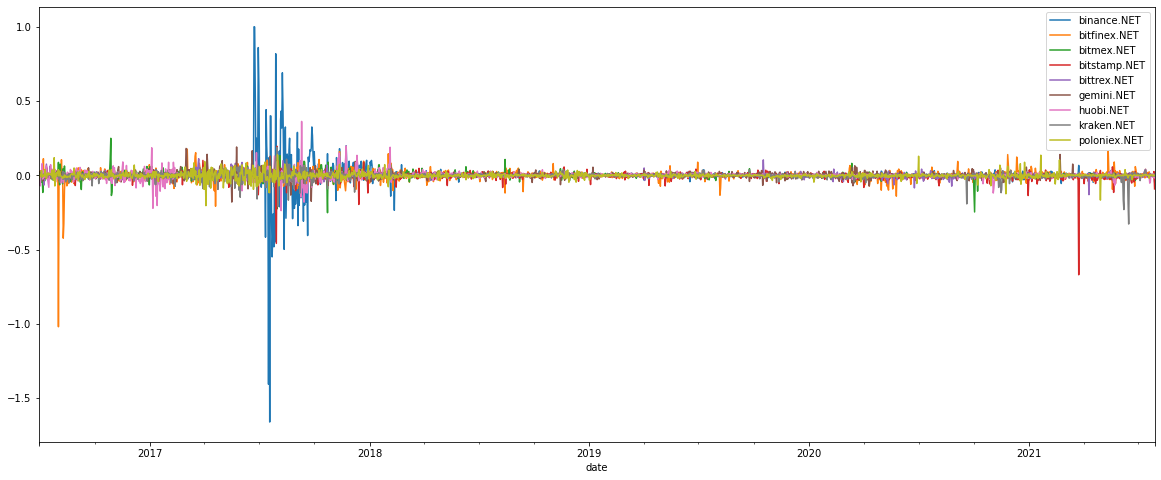

In [36]:
#Plot BTC normalised NET flows
btc_flows.plot(x='date', figsize=(20,8))

<AxesSubplot:xlabel='date'>

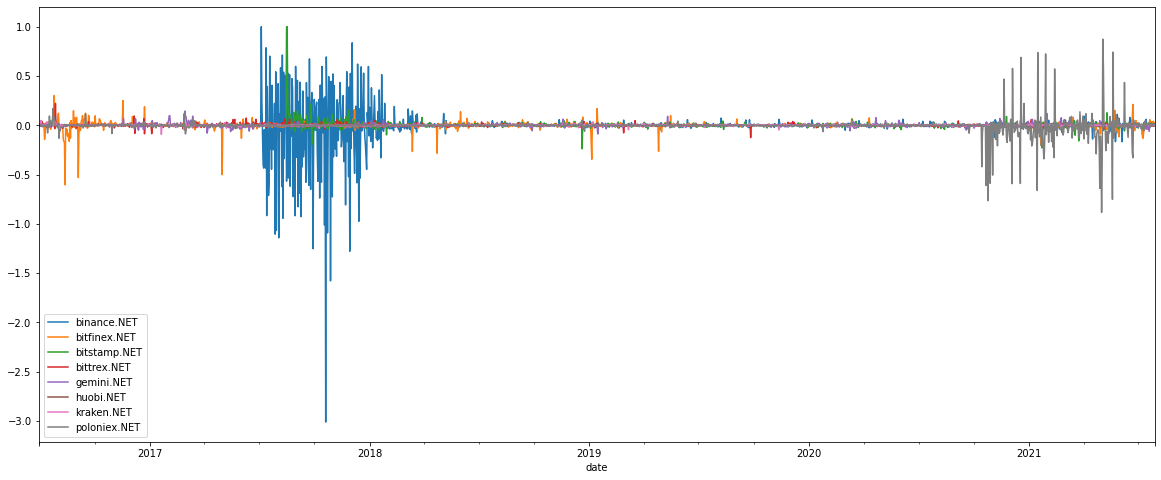

In [37]:
#Plot ETH normalised NET flows
eth_flows.plot(x='date', figsize=(20,8))

In [38]:
#create final dataframes
#exchange flows +  daily prices
#btc
btc_daily_data = btc_flows
btc_daily_data['close'] = btc_daily_prices['close'].values
btc_daily_data['high'] = btc_daily_prices['high'].values
btc_daily_data['low'] = btc_daily_prices['low'].values
btc_daily_data['high-low'] = btc_daily_prices['high'].values - btc_daily_prices['low'].values
btc_daily_data['volume'] = btc_volume
btc_daily_data['date'] = btc_daily_prices['time'].values
btc_daily_data.drop(index=btc_daily_data.index[:4], axis=0, inplace=True)
btc_daily_data['weekly_vol'] = weekly_vol_btc.values

#eth
eth_daily_data = eth_flows
eth_daily_data['close'] = eth_daily_prices['close'].values
eth_daily_data['high'] = eth_daily_prices['high'].values
eth_daily_data['low'] = eth_daily_prices['low'].values
eth_daily_data['high-low'] = eth_daily_prices['high'].values - eth_daily_prices['low'].values
eth_daily_data['volume'] = eth_volume
eth_daily_data['date'] = eth_daily_prices['time'].values
eth_daily_data.drop(index=eth_daily_data.index[:4], axis=0, inplace=True)
eth_daily_data['weekly_vol'] = weekly_vol_eth.values

In [39]:
btc_daily_data

,date,binance.NET,bitfinex.NET,bitmex.NET,bitstamp.NET,bittrex.NET,gemini.NET,huobi.NET,kraken.NET,poloniex.NET,close,high,low,high-low,volume,weekly_vol
4,2016-07-04,0.000000,0.001660,-0.003988,0.003470,0.011064,0.005198,0.024649,0.022781,0.007431,675.16,679.03,644.04,34.99,67140.0,7.773625
5,2016-07-05,0.000000,-0.011358,-0.046352,-0.005179,-0.000648,-0.001491,0.030021,-0.003803,0.030980,663.67,679.19,657.31,21.88,66150.0,7.634982
6,2016-07-06,0.000000,0.000691,-0.015311,0.005517,0.007162,-0.002760,0.078390,-0.010756,-0.013494,672.70,678.39,662.24,16.15,64870.0,9.708395
7,2016-07-07,0.000000,0.013277,-0.115734,-0.007600,-0.002311,-0.038045,-0.025930,0.000635,-0.008824,635.25,676.19,604.95,71.24,118340.0,8.003366
8,2016-07-08,0.000000,0.111602,-0.017591,-0.005359,0.021593,0.008810,0.029312,0.007042,0.002646,662.78,663.43,630.17,33.26,97460.0,8.281091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,2021-07-24,-0.000504,-0.001567,-0.001019,0.001117,-0.001021,0.000317,-0.000964,-0.004108,0.002328,34282.56,34519.75,33429.09,1090.66,63910.0,370.044137
1851,2021-07-25,-0.008142,-0.000872,-0.003887,0.004664,-0.001471,0.001484,-0.011410,-0.005160,0.002814,35369.93,35382.63,33892.36,1490.27,99270.0,344.833062
1852,2021-07-26,-0.002849,-0.008270,0.003795,0.004621,-0.012316,0.007896,0.009216,-0.002045,-0.006142,37269.52,40553.85,35270.24,5283.61,67380.0,453.678573
1853,2021-07-27,0.011221,-0.021427,-0.001135,0.025019,-0.011776,0.000672,-0.019207,-0.006239,-0.000005,39496.69,39535.50,36422.45,3113.05,92230.0,468.232739


In [40]:
#Forward-fill missing values

btc_daily_data = btc_daily_data.fillna(method='ffill')
eth_daily_data = eth_daily_data.fillna(method='ffill')
btc_daily_data = btc_daily_data.replace(to_replace=0, method='ffill')
eth_daily_data = eth_daily_data.replace(to_replace=0, method='ffill')

In [34]:
#save as csv

btc_daily_data.to_csv('btc_daily_data_NET_vol.csv')

eth_daily_data.to_csv('eth_daily_data_NET_vol.csv')